# Game: Visual Dialogue

This game, introduced by \cite{visdial}, is a natural extension to VQA. There is a questioner and an answerer. The questioner is given a caption (from the COCO caption set), and only the answerer sees the corresponding image. The questioner must ask 10 questions triggered by the caption, which the answerer must briefly answer. Other than that, they are not following any goals with their interaction.

In [1]:
# imports
import configparser
import sys
import os
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load up config file (needs path; adapt env var if necessary); local imports
config_path = os.environ.get('VISCONF')
if not config_path:
    # try default location, if not in environment
    default_path_to_config = '../../clp-vision/Config/default.cfg'
    if os.path.isfile(default_path_to_config):
        config_path = default_path_to_config

assert config_path is not None, 'You need to specify the path to the config file via environment variable VISCONF.'        

config = configparser.ConfigParser()
with open(config_path, 'r', encoding='utf-8') as f:
    config.readfp(f)

corpora_base = config.get('DEFAULT', 'corpora_base')
preproc_path = config.get('DSGV-PATHS', 'preproc_path')
dsgv_home = config.get('DSGV-PATHS', 'dsgv_home')

sys.path.append(dsgv_home + '/Utils')
from utils import icorpus_code, plot_labelled_bb, get_image_filename, plot_img_ax, query_by_id
sys.path.append('../Common')
from data_utils import load_dfs

/home/patrick/Documents/clp/ver3/sempix/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: This method will be removed in future versions.  Use 'parser.read_file()' instead.
  del sys.path[0]


In [3]:
# Load up preprocessed DataFrames. Slow!
# These DataFrames are the result of pre-processing the original corpus data,
# as per dsg-vision/Preprocessing/preproc.py

df_names = ['mscoco_bbdf', 'vd_df', 'mscoco_catsdf']
df = load_dfs(preproc_path, df_names)

In [4]:
def show_dial(this_dial):
    this_dial_df = df['vd_df'].query('(dial_id == @this_dial) & (split == "train")')
    ic, ii, trigger_cap = this_dial_df.iloc[0]['corpus_id image_id trigger_caption'.split()]
    turns = this_dial_df[['question', 'answer']].values

    print(trigger_cap)
    print('')
    for turn in turns:
        print('{:>30}?'.format(turn[0]), ' ', '{:<40}'.format(turn[1]))
    plot_labelled_bb(get_image_filename(config, ic, ii), [])

food items are on a kitchen table and camping chairs are in a corner of the room

       what color is the table?   brown                                   
          is it large or small?   medium size                             
             what color chairs?   brown                                   
             what kind of food?   think it is soup                        
                    any dishes?   no                                      
      what color are the walls?   yellowish                               
             is there a fridge?   yes                                     
                    what color?   white                                   
          is there a microwave?   yes                                     
             is there a window?   no                                      


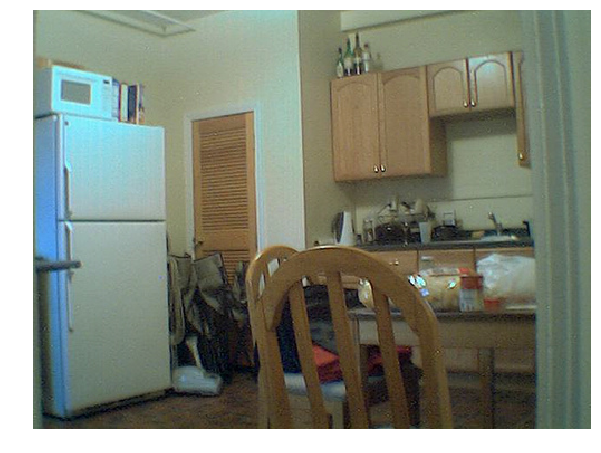

In [5]:
show_dial(49)

a grandfather clock fits into the corner of an ornately decorated living room

is the grandfather looked antique?   yes                                     
                    is it tall?   yes                                     
                 is it painted?   the clock is brown wood                 
        what time does it tell?   the photo doesn't really show that      
      are there couch and sofa?   yes                                     
             is it antique too?   no                                      
             is the room clean?   yes                                     
    is the whole living modern?   it seems to be                          
what other furniture are there?   coffee table                            
              are there people?   no                                      


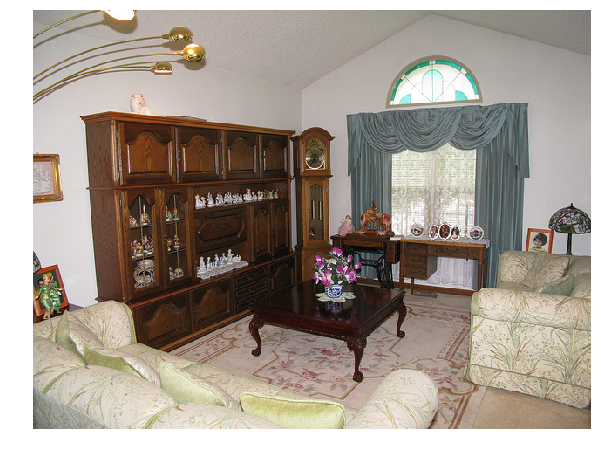

In [6]:
show_dial(657)